In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Flatten
from sklearn.metrics import accuracy_score
import numpy as np

In [2]:

train_dir = r"C:\Users\Shaurya\Desktop\CDAC Project\Hindi\Train"
test_dir  = r"C:\Users\Shaurya\Desktop\CDAC Project\Hindi\Test"

train_ds = tf.keras.utils.image_dataset_from_directory(
    train_dir,
    image_size=(28, 28),
    color_mode="grayscale",
    batch_size=64,
    label_mode="int",
    shuffle=True
)
test_ds = tf.keras.utils.image_dataset_from_directory(
    test_dir,
    image_size=(28, 28),
    color_mode="grayscale",
    batch_size=64,
    label_mode="int",
    shuffle=False
)

train_ds = train_ds.map(lambda x, y: (x / 255.0, y), num_parallel_calls=tf.data.AUTOTUNE)
test_ds  = test_ds.map(lambda x, y: (x / 255.0, y), num_parallel_calls=tf.data.AUTOTUNE)
train_ds = train_ds.cache().prefetch(tf.data.AUTOTUNE)
test_ds  = test_ds.cache().prefetch(tf.data.AUTOTUNE)

for images, labels in train_ds.take(1):
    print("Batch image shape:", images.shape, "Batch label shape:", labels.shape)

Found 17000 files belonging to 10 classes.
Found 3000 files belonging to 10 classes.
Batch image shape: (64, 28, 28, 1) Batch label shape: (64,)


In [3]:
model = Sequential()
model.add(Flatten(input_shape=(28, 28)))
model.add(Dense(128, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(10, activation='softmax'))
model.summary()

D:\software_Installation\anaconda3\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten (Flatten)                    │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │         100,480 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 32)                  │           4,128 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 10)                  │             330 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 104,938 (409.91 KB)

 Trainable params: 104,938 (409.91 KB)

 Non-trainable params: 0 (0.00 B)

In [4]:
model.compile(loss='sparse_categorical_crossentropy', optimizer='Adam', metrics=['accuracy'])
history = model.fit(train_ds, epochs=25, validation_data=test_ds)

Epoch 1/25
266/266 ━━━━━━━━━━━━━━━━━━━━ 31s 112ms/step - accuracy: 0.7560 - loss: 0.8015 - val_accuracy: 0.9513 - val_loss: 0.1740
Epoch 2/25
266/266 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9611 - loss: 0.1417 - val_accuracy: 0.9683 - val_loss: 0.1148
Epoch 3/25
266/266 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9754 - loss: 0.0895 - val_accuracy: 0.9713 - val_loss: 0.1007
Epoch 4/25
266/266 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9838 - loss: 0.0623 - val_accuracy: 0.9750 - val_loss: 0.0853
Epoch 5/25
266/266 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9887 - loss: 0.0440 - val_accuracy: 0.9780 - val_loss: 0.0813
Epoch 6/25
266/266 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9932 - loss: 0.0318 - val_accuracy: 0.9797 - val_loss: 0.0781
Epoch 7/25
266/266 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9951 - loss: 0.0245 - val_accuracy: 0.9800 - val_loss: 0.0750
Epoch 8/25
266/266 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9963 - loss: 0.0178 - val_accuracy:

In [5]:
y_prob = model.predict(test_ds)
y_pred = np.argmax(y_prob, axis=1)
y_true = np.concatenate([y for _, y in test_ds], axis=0)
print("Test Accuracy:", accuracy_score(y_true, y_pred))

47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
Test Accuracy: 0.9886666666666667


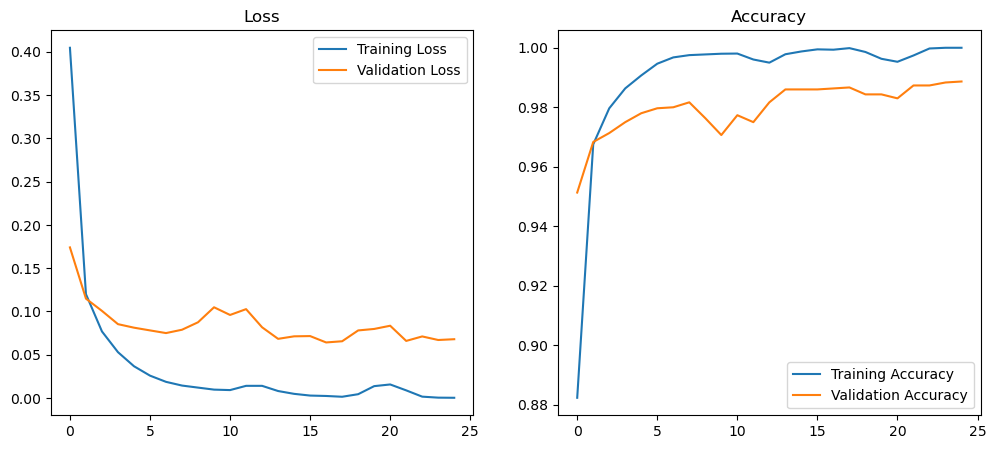

In [6]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.title('Loss')

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.title('Accuracy')

plt.show()